####  **Import Libraries and modules**

In [1]:
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras import backend as k
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets
Plotting a sample image from the dataset 

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


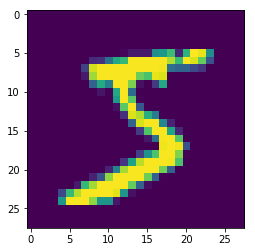

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Normalise the pixel values to get values between 0 and 1

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

One hot encoding the labels from training and test set. Each 1d label is converted to 10d sparse matrix. Eg, digit 2 becomes [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Original model
68K parameters giving accuracy of 99.54% after 10 epochs

In [0]:
model = Sequential()
 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(10, 1, activation='relu'))
model.add(Conv2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

W0805 16:09:47.538334 140454548146048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 16:09:47.613204 140454548146048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.2103 - acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0791 - acc: 0.9770
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0577 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.0455 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0378 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0311 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0259 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0206 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0179 - acc: 0.9938
Epoch 10/10
60000/60000 [==============================] - 13s 218us/step - loss: 

## First code iteration - Reduced parameters from 68000 to 13,746 which is less than 15,000 parameters.

In [0]:
def build_first_model():
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))  # output size - 26x26, RF-3
  model.add(Conv2D(16, 3, 3, activation='relu'))  # output size - 24x24, RF-5
  model.add(Conv2D(16, 3, 3, activation='relu'))  # output size - 22x22, RF-7

  model.add(MaxPooling2D(pool_size=(2, 2)))    # output size - 11x11, RF-14
  model.add(Conv2D(10, 1, activation='relu'))  # output size - 11x11, RF-14

  model.add(Conv2D(16, 3, 3, activation='relu')) # output size - 9x9, RF-16
  model.add(Conv2D(16, 3, 3, activation='relu'))  # output size - 7x7, RF-18
  model.add(Conv2D(16, 3, 3, activation='relu'))  # output size is 5x5, RF-20
    
  model.add(Conv2D(10, 1, 1, activation='relu'))

  model.add(Conv2D(10, 5))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

#### Changes in the new model:

*   Added transition block(max pooling+pointwise conv) after 3 layers of convolution with (3x3) kernel.
*   Increased number of conv layers to 9 from 3. The last convolution layer which is flattened has 5x5
instead of 26x26.
* Changed number of kernels in each convolution layer to 16 to limit the number of parameters.
Another approach could have been lesser convolution layers and increasing number of kernels from 16 to 32.

In [0]:
model=build_first_model()
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 10)        170       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 16)          2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':


#### Trained the new model for 20 epochs.  Best validation accuracy was 99.19 at epoch 13, when training acc was 99.28%. After this model started overfitting since training acc increased to 99.5% at epoch 18, but validation became 98.95%. 
We continue with this network for the next code iterations.

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 413us/step - loss: 0.2602 - acc: 0.9179 - val_loss: 0.0859 - val_acc: 0.9740
Epoch 2/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.0880 - acc: 0.9731 - val_loss: 0.0664 - val_acc: 0.9801
Epoch 3/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0508 - val_acc: 0.9850
Epoch 4/20
60000/60000 [==============================] - 24s 393us/step - loss: 0.0523 - acc: 0.9840 - val_loss: 0.0437 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.0435 - acc: 0.9867 - val_loss: 0.0470 - val_acc: 0.9850
Epoch 6/20
60000/60000 [==============================] - 24s 398us/step - loss: 0.0391 - acc: 0.9880 - val_loss: 0.0493 - val_acc: 0.9838
Epoch 7/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.

## Second Code iteration - Need to reduce overfitting which is done by adding dropout.
Small dropout of 10% is added after every Convolution (3,3) layer.


In [0]:
def build_second_model():
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
  model.add(Dropout(0.1))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(Dropout(0.1))

  model.add(MaxPooling2D(pool_size=(2, 2)))    # after this size is 11x11, RF-14
  model.add(Conv2D(10, 1, activation='relu'))

  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(16, (3, 3), activation='relu'))  # after this size is 5x5, RF-20
  model.add(Dropout(0.1))
    
  model.add(Conv2D(10, 1, activation='relu'))

  model.add(Conv2D(10, 5))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_second_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0811 04:10:32.279354 139705203124096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 04:10:32.316823 139705203124096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 04:10:32.323195 139705203124096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 04:10:32.351069 139705203124096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0811 04:10:32.359732 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
__________

In [5]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive

drive.mount('/content/gdrive')
dir="/content/gdrive/My Drive/Colab Notebooks/EVA/Weights/"
file = dir + "Assign4.2.{epoch:02d}-{val_acc:.4f}.hdf5"

!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


#### Trained the new model for 20 epochs.  Best validation accuracy was 99.3 at epoch 17, when training acc was 99.03%. 

In [0]:
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 498us/step - loss: 0.2849 - acc: 0.9087 - val_loss: 0.0708 - val_acc: 0.9778

Epoch 00001: val_acc improved from -inf to 0.97780, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.2.01-0.9778.hdf5
Epoch 2/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.0929 - acc: 0.9715 - val_loss: 0.0547 - val_acc: 0.9830

Epoch 00002: val_acc improved from 0.97780 to 0.98300, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.2.02-0.9830.hdf5
Epoch 3/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.0719 - acc: 0.9778 - val_loss: 0.0491 - val_acc: 0.9838

Epoch 00003: val_acc improved from 0.98300 to 0.98380, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.2.03-0.9838.hdf5
Epoch 4/20
60000/60000 [==============================] - 28s 467us/step - loss: 0.060

In [0]:
model.load_weights(dir + "Assign4.2.17-0.9930.hdf5")
print("Loaded model from disk ")

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Loaded model from disk 
[0.024330410757218486, 0.993]


## Third Code iteration - Added Batch Normalisation after every Conv layer

6 layers of batch normalisation added a few more trainable parameters to make it **14130**.
And number of non trainable params 192.

In [0]:
def build_third_model():
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))

  model.add(MaxPooling2D(pool_size=(2, 2)))    # after this size is 11x11, RF-14
  model.add(Conv2D(10, 1, activation='relu'))

  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(16, (3, 3), activation='relu'))  # after this size is 5x5, RF-20
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
    
  model.add(Conv2D(10, 1, activation='relu'))

  model.add(Conv2D(10, 5))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

#### Trained the new model for 30 epochs for batch_sizes 32 and 64. Result:
* Batch_size 32 : Best validation accuracy was **99.4 at epoch 19**, when training acc was 99.25%. 
* Batch_size 64 : Best validation accuracy was **99.36 at epoch 21**, when training acc was 99.24%.

Batch_size 32, was marginally better, though it may not be consistent for every run. Also it takes more time ~22s. (64 takes 11s). We continue with this batch size.


In [0]:
model=build_third_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

file = dir + "Assign4.3.{epoch:02d}-{val_acc:.4f}.hdf5" 
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 22, 22, 16)        2320      
__________

## Best accuracy till now at iteration 19

In [0]:
model.load_weights(dir + "Assign4.3.19-0.9940.hdf5")
print("Loaded model from disk ")

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Loaded model from disk 
[0.018334998509348225, 0.994]


## Same model with batch_size 64

In [0]:
model=build_third_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

file = dir + "Assign4.3.{epoch:02d}-{val_acc:.4f}.hdf5" 
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[checkpoint])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 16)        2320      
__________

## Fourth Code iteration - Added LearningRateScheduler as callback to fit method, This is done for more fine grained gradient control.
Used the model from previous iteration.

In [0]:
model=build_third_model()

#### Tried with 2 scheduler functions :

1.   initial lr 0.003 till 0.00029
2.   initial lr 0.001 till 0.00014

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

custom_lr = LearningRateScheduler(scheduler, verbose=1)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

### 1. Best validation accuracy was 99.47 at epoch 24, when training acc was 99.54%.

In [0]:
file = dir + "Assign4.4.{epoch:02d}-{val_acc:.4f}.hdf5" 
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[checkpoint, custom_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 27s 454us/step - loss: 0.1681 - acc: 0.9477 - val_loss: 0.0530 - val_acc: 0.9829

Epoch 00001: val_acc improved from -inf to 0.98290, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.4.01-0.9829.hdf5
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 24s 394us/step - loss: 0.0686 - acc: 0.9782 - val_loss: 0.0714 - val_acc: 0.9783

Epoch 00002: val_acc did not improve from 0.98290
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 24s 395us/step - loss: 0.0535 - acc: 0.9833 - val_loss: 0.0489 - val_acc: 0.9830

Epoch 00003: val_acc improved from 0.98290 to 0.98300, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/

In [0]:
model=build_third_model()

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

new_lr = LearningRateScheduler(scheduler, verbose=1)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

### 2. Best validation accuracy was 99.43 at epoch 18. Next best was 99.4% at epoch 11. 
This is the best one since even though the accuracy is lower than earlier one, has happened at an earlier epoch.

In [0]:
file = dir + "Assign4.5.{epoch:02d}-{val_acc:.4f}.hdf5" 
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1,
          validation_data=(X_test, Y_test), callbacks=[checkpoint, new_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
60000/60000 [==============================] - 24s 397us/step - loss: 0.2628 - acc: 0.9160 - val_loss: 0.0574 - val_acc: 0.9811

Epoch 00001: val_acc improved from -inf to 0.98110, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.5.01-0.9811.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007581501.
60000/60000 [==============================] - 22s 361us/step - loss: 0.0728 - acc: 0.9778 - val_loss: 0.0483 - val_acc: 0.9847

Epoch 00002: val_acc improved from 0.98110 to 0.98470, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/Weights/Assign4.5.02-0.9847.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0006105006.
60000/60000 [==============================] - 22s 359us/step - loss: 0.0560 - acc: 0.9824 - val_loss: 0.0394 - val_acc: 0.9878

Epoch 00003: val_

In [13]:
model.load_weights(dir + "Assign4.5.18-0.9943.hdf5")
print("Loaded model from disk ")

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Loaded model from disk 
[0.023296371747613013, 0.9943]
